Linear Regression (Housing Area csv)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt


In [ ]:
df= pd.read_csv('/content/housing_area_price.csv')

In [ ]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


LinearRegression()

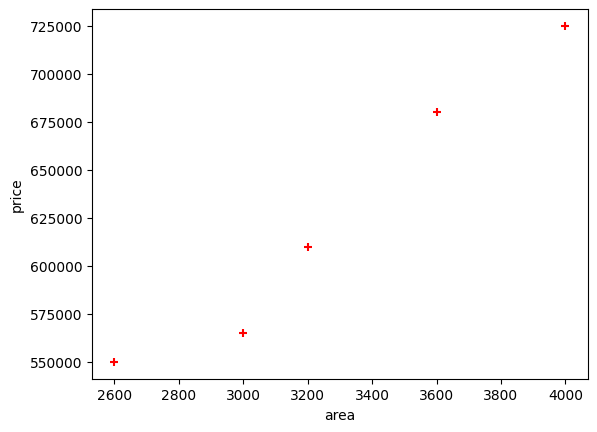

In [ ]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='red',marker='+')

new_df = df.drop('price',axis='columns')
new_df

price = df.price
price

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,price)


In [ ]:
reg.predict([[3300]])
print(reg.coef_,reg.intercept_)

[135.78767123] 180616.43835616432


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
print(f'3300 * {reg.coef_} + {reg.intercept_}')

3300 * [135.78767123] + 180616.43835616432


In [ ]:
reg.predict([[5000]])
print(reg.coef_, reg.intercept_)
print(f'5000*{reg.coef_}+{reg.intercept_}')

[135.78767123] 180616.43835616432
5000*[135.78767123]+180616.43835616432


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Linear Regression ( Salary )

6.8 * [9398.64060184] + 27197.2020175696


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


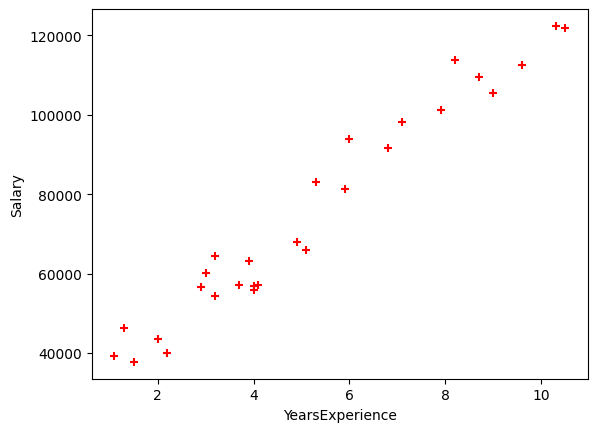

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('/content/salary.csv')
df

# Commented out IPython magic to ensure Python compatibility.
# %matplotlib inline
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.scatter(df.YearsExperience,df.Salary,color='red',marker='+')

df['YearsExperience'] = df['YearsExperience'].fillna(df['YearsExperience'].mean())
new_df = df.drop('Salary',axis='columns')
new_df

salary = df.Salary
salary

# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(new_df,salary)

"""(1) Predict price of a home with area = 3300 sqr ft"""

reg.predict([[6.8]])

reg.coef_

reg.intercept_

print(f'6.8 * {reg.coef_} + {reg.intercept_}')



Linear Regression Canada_per_capita_income csv

   year  per capita income (US$)
0  1970              3399.299037
1  1971              3768.297935
2  1972              4251.175484
3  1973              4804.463248
4  1974              5576.514583
Year=2020, Predicted Income=$41,288.69
Year=2027, Predicted Income=$47,087.95
-------------------------------------------------------------------------------------------
Coefficient (m): 828.47
-------------------------------------------------------------------------------------------
Intercept (b): -1,632,210.76
-------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


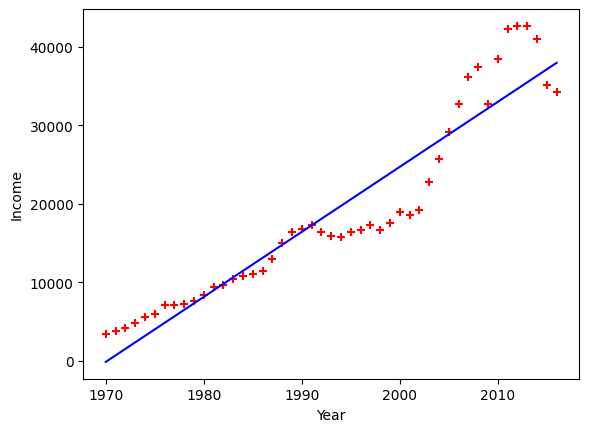

In [ ]:
#canada_per_capita_income.csv
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

df = pd.read_csv('/content/canada_per_capita_income.csv')
print(df.head())
df = df.rename(columns={'per capita income (US$)': 'Income'})

df.dropna(inplace=True)


plt.xlabel('Year')
plt.ylabel('Income')
plt.scatter(df.year, df.Income, color='red', marker='+')

# Prepare input feature
X = df[['year']]  # Independent variable
y = df['Income']  # Dependent variable (what we want to predict)

# Train linear regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Predict future incomes
year_2020 = reg.predict([[2020]])[0]
year_2027 = reg.predict([[2027]])[0]

print(f'Year=2020, Predicted Income=${year_2020:,.2f}')
print(f'Year=2027, Predicted Income=${year_2027:,.2f}')
print("-------------------------------------------------------------------------------------------")
print(f'Coefficient (m): {reg.coef_[0]:,.2f}')
print("-------------------------------------------------------------------------------------------")
print(f'Intercept (b): {reg.intercept_:,.2f}')
print("-------------------------------------------------------------------------------------------")

# Plot regression line
plt.plot(df.year, reg.predict(X), color='blue')
plt.show()


MultiLinear Regression (Homeprice csv)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

# Load dataset
df = pd.read_csv('/content/homeprices_Multiple_LR.csv')

# Handle missing values (Fill NA in 'bedrooms' with median)
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())

# Prepare training data
X = df.drop('price', axis='columns')  # Features: Area, Bedrooms, Age
y = df['price']  # Target: Price

# Train linear regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Display model coefficients
print(f'Coefficients: {reg.coef_}')
print(f'Intercept: {reg.intercept_}\n')

# Predict price of a home with given features
area = 3000
bedrooms = 3
age = 40

predicted_price = (
    reg.coef_[0] * area +
    reg.coef_[1] * bedrooms +
    reg.coef_[2] * age +
    reg.intercept_
)

print(f'Predicted price for a {area} sq. ft home, {bedrooms} bedrooms, {age} years old: ${predicted_price:,.2f}')


Coefficients: [  112.06244194 23388.88007794 -3231.71790863]
Intercept: 221323.00186540396

Predicted price for a 3000 sq. ft home, 3 bedrooms, 40 years old: $498,408.25


MultiLinear Regression (Hiring csv)

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

# Load dataset
df = pd.read_csv('/content/hiring.csv')
df

# Map experience to numerical values
df['experience'] = df['experience'].map({
    'five': 5,
    'four': 4,
    'three': 3,
    'two': 2,
    'one': 1,
    'seven': 7,
    'ten': 10,
    'eleven': 11,
    'zero': 0,
    'twelve': 12
})

# Perform backward fill for experience column
df['experience'] = df['experience'].fillna(method='bfill')

# Fill missing test scores with median value
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].median())

# Rename columns for better readability
df = df.rename(columns={'test_score(out of 10)': 'test_score'})
df = df.rename(columns={'interview_score(out of 10)': 'interview_score'})
df = df.rename(columns={'salary($)': 'salary'})
df

# Prepare training data (X: features, y: target)
X = df.drop('salary', axis='columns')  # Features: Experience, Test Score, Interview Score
y = df['salary']  # Target: Salary

# Train linear regression model
reg = linear_model.LinearRegression()
reg.fit(X, y)

# Display model coefficients
print(f'Coefficients: {reg.coef_}')
print(f'Intercept: {reg.intercept_}\n')

# Predict salary for given features
experience = 12  # Convert 'twelve' to numeric (12)
test_score = 10
interview_score = 10

predicted_salary = (
    reg.coef_[0] * experience +
    reg.coef_[1] * test_score +
    reg.coef_[2] * interview_score +
    reg.intercept_
)

# Print predicted salary in a user-friendly format
print(f'Predicted salary for {experience} years of experience, {test_score} test score, and {interview_score} interview score is: ${predicted_salary:,.2f}')


Coefficients: [3221.39134934 1617.86554643 3176.24086827]
Intercept: 5918.063888238692

Predicted salary for 12 years of experience, 10 test score, and 10 interview score is: $92,515.82


<ipython-input-59-6e39cd427a19>:24: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['experience'] = df['experience'].fillna(method='bfill')
